<a href="https://colab.research.google.com/github/nurefsanoztekin/datan/blob/main/Nuref%C5%9Fan_%C3%96ZTEK%C4%B0N.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

from sklearn import preprocessing

import seaborn as sns
sns.set()

import matplotlib.pyplot as plt



In [95]:
features = ["ID","No_Pation","Gender", "AGE", "Urea", "Cr","HbA1c","Chol", "TG","HDL","LDL","VLDL","BMI", "Class"] 

data = pd.read_csv("https://raw.githubusercontent.com/nurefsanoztekin/datan/main/Dataset%20of%20Diabetes%20.csv", names= features, header=0)
data.sample(11)

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class
356,42,23985,F,58,4.3,56,9.1,4.4,2.0,1.0,2.5,0.9,29.0,Y
908,74,65632,F,55,3.7,41,10.8,5.4,2.2,1.2,3.3,1.0,35.0,Y
228,179,24031,M,56,3.4,44,4.8,4.1,1.5,0.8,1.7,1.4,39.0,Y
745,633,34517,M,54,4.0,76,9.2,5.7,4.2,0.9,3.2,1.9,30.0,Y
572,773,34220,F,56,4.0,45,9.2,4.1,0.6,1.3,1.4,0.9,30.0,Y
273,1,34325,M,58,20.8,800,9.1,6.6,2.9,1.1,4.3,1.3,33.0,Y
770,343,34531,F,55,2.4,36,12.4,4.3,2.4,1.8,1.3,1.5,29.0,Y
147,41,1655,M,40,3.4,64,5.7,6.5,3.8,1.0,3.9,1.7,31.0,P
165,57,23990,M,35,4.8,64,7.7,3.7,1.0,1.2,2.0,7.2,27.3,Y
293,462,34331,F,52,2.0,34,5.8,6.0,1.2,1.1,2.0,0.5,33.0,Y


In [96]:
data = data.drop(['ID'], axis=1)
data.sample(11)

,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class
819,4084,M,55,4.10,58,10.3,7.3,4.60,1.30,1.40,0.7,29.00,Y
127,44433,M,33,4.80,64,5.8,4.8,1.10,1.70,2.60,0.5,25.00,P
801,34551,M,52,4.40,38,13.2,3.9,1.30,1.60,1.70,0.6,35.00,Y
56,34264,F,49,2.30,52,5.0,3.1,1.30,1.00,2.50,0.7,22.00,N
870,6546,M,55,6.10,80,8.5,5.6,2.10,0.90,3.80,0.4,26.00,Y
751,3034,F,52,2.80,35,12.8,4.8,4.00,1.10,2.10,1.8,36.60,Y
402,24114,M,55,3.66,67,7.0,5.6,1.91,1.30,3.50,13.1,39.18,Y
115,56826,F,49,3.30,44,6.0,5.6,1.90,0.75,1.35,0.8,21.00,P
378,39550,F,54,4.30,44,7.6,5.4,2.00,1.00,3.50,0.9,30.00,Y
524,34416,M,63,4.40,57,11.3,9.8,1.90,1.10,7.90,0.8,35.00,Y


In [18]:
print("Satır:", data.shape[0], '\t', "Sütun:", data.shape[1])
print("-"*73)
print(data.columns)

Satır: 1000 	 Sütun: 13
-------------------------------------------------------------------------
Index(['No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG',
       'HDL', 'LDL', 'VLDL', 'BMI', 'Class'],
      dtype='object')


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   No_Pation  1000 non-null   int64  
 1   Gender     1000 non-null   object 
 2   AGE        1000 non-null   int64  
 3   Urea       1000 non-null   float64
 4   Cr         1000 non-null   int64  
 5   HbA1c      1000 non-null   float64
 6   Chol       1000 non-null   float64
 7   TG         1000 non-null   float64
 8   HDL        1000 non-null   float64
 9   LDL        1000 non-null   float64
 10  VLDL       1000 non-null   float64
 11  BMI        1000 non-null   float64
 12  Class      1000 non-null   object 
dtypes: float64(8), int64(3), object(2)
memory usage: 101.7+ KB


In [20]:
data.sample(27)

,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class
649,34475,M,52,4.1,139,10.8,4.8,2.2,0.9,3.0,1.0,33.0,Y
555,34433,F,60,5.1,45,6.3,5.2,1.5,1.6,1.8,1.0,39.0,Y
653,34476,M,51,3.7,58,9.0,6.2,1.5,1.6,1.7,1.5,35.0,Y
734,34511,M,63,7.9,88,7.4,4.7,2.0,1.4,4.2,1.5,33.0,Y
906,87876,M,55,2.0,51,6.5,5.2,2.3,1.2,4.3,1.4,22.0,Y
391,24108,F,54,4.3,44,7.6,5.4,2.0,1.0,3.5,0.9,27.3,Y
455,34381,F,51,3.0,41,8.3,4.0,2.8,0.7,2.1,1.2,29.0,Y
771,9625,M,55,5.3,49,10.5,5.6,5.5,0.7,2.6,2.5,27.4,Y
783,3856,M,55,5.1,61,10.5,4.6,1.5,0.8,2.1,0.6,30.0,Y
227,24030,M,52,3.0,60,7.0,3.8,3.2,0.8,1.7,1.4,33.0,Y


In [22]:
data["Class"].value_counts()

Y     840
N     102
P      53
Y       4
N       1
Name: Class, dtype: int64

In [27]:
data = data.replace({'Class': {"Y": 0, "P": 1, "N":2}})
data = data.replace({'Gender': {"M": 1, "F": 0}})
data.sample(15)

,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class
609,24010,1,62,5.00,63,12.2,3.6,5.10,0.9,2.5,0.9,30.00,0
205,24018,0,33,1.80,31,7.4,3.7,1.20,1.6,1.5,0.5,31.50,0
403,8554,1,55,3.66,67,7.0,5.6,1.91,1.3,3.5,13.1,39.18,0
425,2345,1,55,4.16,60,7.6,6.5,2.10,1.3,4.3,14.5,34.50,0
37,34298,1,46,2.00,54,5.4,3.7,1.30,0.8,2.4,0.6,21.00,2
110,45573,1,47,4.10,87,6.2,3.7,1.80,1.0,2.0,0.8,23.00,1
263,24048,0,52,6.00,76,6.5,2.7,1.20,0.8,1.4,0.5,31.00,0
829,34570,1,52,4.70,53,12.2,5.7,3.50,3.6,1.6,1.0,37.00,0
645,24002,1,59,4.00,56,10.0,4.9,2.10,1.1,2.5,0.9,28.00,0
859,14191,1,51,5.50,83,9.4,3.8,0.90,1.5,2.0,0.2,30.00,0


In [28]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
No_Pation,1000.0,270551.408000,3.380758e+06,123.0,24063.75,34395.5,45384.25,75435657.00
AGE,1000.0,53.528000,8.799241e+00,20.0,51.00,55.0,59.00,79.00
Urea,1000.0,5.124743,2.935165e+00,0.5,3.70,4.6,5.70,38.90
Cr,1000.0,68.943000,5.998475e+01,6.0,48.00,60.0,73.00,800.00
HbA1c,1000.0,8.281160,2.534003e+00,0.9,6.50,8.0,10.20,16.00
Chol,1000.0,4.862820,1.301738e+00,0.0,4.00,4.8,5.60,10.30
TG,1000.0,2.349610,1.401176e+00,0.3,1.50,2.0,2.90,13.80
HDL,1000.0,1.204750,6.604136e-01,0.2,0.90,1.1,1.30,9.90
LDL,1000.0,2.609790,1.115102e+00,0.3,1.80,2.5,3.30,9.90
VLDL,1000.0,1.854700,3.663599e+00,0.1,0.70,0.9,1.50,35.00


In [29]:
data.isnull().sum()

No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
Class        0
dtype: int64

In [30]:
data_without_NAN = data.dropna()
data_without_NAN.shape

(1000, 13)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


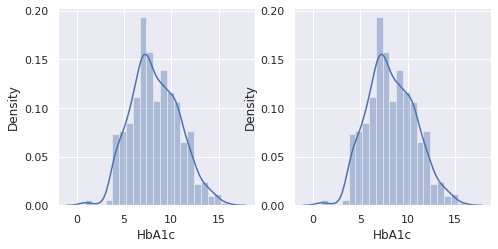

In [36]:
plt.figure(figsize=(12,8))

plt.subplot(2,3,1)
sns.distplot(data_without_NAN['HbA1c'])

plt.subplot(2,3,2)
sns.distplot(data['HbA1c'])

plt.show()

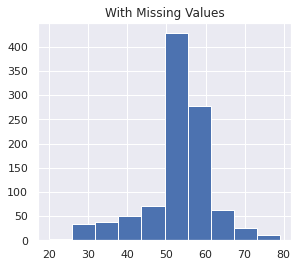

In [45]:
HbA1c_NAN = data.HbA1c.isna()
HbA1c_labels = ['With Missing Values','Without Missing Values']
AGE_range = (data.AGE.min(),data.AGE.max())

plt.figure(figsize=(10,4))

for i,poss in enumerate(HbA1c_NAN.unique()):
    plt.subplot(1,2,i+1)
    BM = HbA1c_NAN == poss
    data[BM].AGE.hist()
    plt.xlim = AGE_range
    plt.title(HbA1c_labels[i])

plt.show()

TypeError: ignored

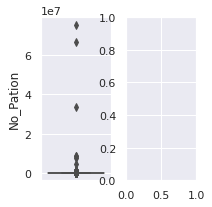

In [68]:
plt.figure(figsize=(18,3))
for i,att in enumerate(X.columns):
    plt.subplot(1,len(X.columns),i+1)
    sns.boxplot(y=data[att])
plt.tight_layout()
plt.show()

In [74]:
print(np.where(data['Urea']>10))

(array([ 20,  95, 151, 273, 283, 303, 310, 323, 331, 369, 374, 406, 407,
       429, 502, 505, 521, 533, 540, 587, 589, 590, 592, 607, 648, 650,
       683, 688, 806, 807, 846, 855, 860, 874, 884, 892, 917, 944, 972,
       974, 976, 977, 985, 994, 995]),)


In [72]:
print(np.where(data['Cr']>100))

(array([ 20,  83,  87,  91,  93,  94,  95,  96,  99, 151, 154, 208, 212,
       224, 273, 283, 303, 309, 310, 316, 323, 326, 331, 336, 406, 407,
       502, 505, 516, 521, 533, 589, 590, 592, 602, 648, 649, 650, 682,
       688, 709, 806, 807, 846, 849, 855, 860, 892, 917, 944, 951, 952,
       959, 961, 964, 967, 968, 969, 972, 974, 977, 983, 985, 994]),)


In [87]:
print(np.where(data['Chol']> 6.9))

(array([ 41,  48,  70, 176, 177, 220, 221, 247, 248, 352, 355, 366, 367,
       372, 373, 408, 409, 412, 415, 431, 450, 523, 524, 526, 528, 532,
       607, 621, 622, 638, 662, 667, 698, 709, 711, 742, 776, 811, 812,
       814, 819, 821, 826, 830, 831, 897, 914, 921, 936, 937, 944, 952,
       955, 970, 976, 978, 995]),)


In [85]:
print(np.where(data['HDL']> 1.7))

(array([  0,   2,   3,   8,   9,  54,  60,  63,  76,  81,  94, 100, 124,
       155, 179, 208, 212, 222, 229, 234, 235, 237, 251, 258, 266, 269,
       277, 282, 284, 286, 352, 355, 383, 390, 411, 412, 414, 415, 446,
       447, 473, 489, 495, 506, 509, 547, 548, 551, 558, 602, 606, 607,
       620, 661, 689, 690, 692, 695, 702, 705, 706, 712, 713, 716, 717,
       722, 752, 753, 754, 769, 770, 802, 814, 816, 817, 822, 829, 832,
       833, 834, 837, 853, 858, 865, 873, 875, 876, 880, 881, 924, 953,
       966, 970, 974, 980, 992]),)


In [88]:
print(np.where(data['BMI']> 33.3))

(array([156, 158, 159, 163, 164, 173, 183, 188, 193, 198, 208, 212, 225,
       228, 229, 231, 232, 234, 235, 237, 242, 245, 265, 266, 269, 272,
       276, 277, 278, 280, 281, 282, 284, 286, 287, 288, 304, 312, 324,
       329, 330, 332, 335, 338, 342, 343, 345, 349, 361, 364, 370, 375,
       381, 387, 389, 398, 400, 402, 403, 404, 406, 407, 408, 409, 411,
       414, 425, 435, 437, 440, 442, 445, 446, 447, 458, 463, 467, 468,
       470, 472, 491, 495, 497, 499, 503, 519, 524, 527, 528, 529, 530,
       532, 541, 542, 543, 548, 549, 551, 552, 553, 555, 556, 558, 559,
       568, 577, 579, 581, 582, 583, 592, 603, 605, 607, 610, 613, 615,
       620, 622, 634, 644, 653, 654, 655, 659, 660, 663, 684, 685, 689,
       693, 698, 699, 701, 702, 704, 705, 721, 723, 728, 729, 730, 731,
       736, 747, 749, 751, 754, 756, 757, 765, 775, 777, 779, 780, 782,
       798, 800, 801, 804, 805, 806, 821, 824, 826, 827, 829, 831, 841,
       844, 846, 856, 869, 878, 881, 882, 908, 917, 921, 926, 9

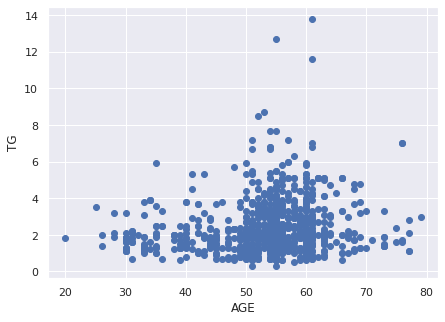

In [89]:
fig, ax = plt.subplots(figsize = (7,5))
ax.scatter(data['AGE'], data['TG'])
ax.set_xlabel('AGE')
ax.set_ylabel('TG')
plt.show()

In [91]:
pre_process_df = data
candidate_atts = ["No_Pation","Gender", "AGE", "Urea", "Cr","HbA1c","Chol", "TG","HDL","LDL","VLDL","BMI", "Class"] 

for att in candidate_atts:
    Q3 = pre_process_df[att].quantile(0.75)
    Q1 = pre_process_df[att].quantile(0.25)
    IQR = Q3 - Q1

    lower_cap = Q1-IQR*1.5
    upper_cap = Q3+IQR*1.5

    BM = pre_process_df[att] < lower_cap
    candidate_index = pre_process_df[BM].index
    pre_process_df.loc[candidate_index,att] = lower_cap

    BM = pre_process_df[att] > upper_cap
    candidate_index = pre_process_df[BM].index
    pre_process_df.loc[candidate_index,att] = upper_cap

TypeError: ignored

In [97]:
print(data.shape)
print(pre_process_df.shape)

(1000, 13)
(1000, 13)


TypeError: ignored

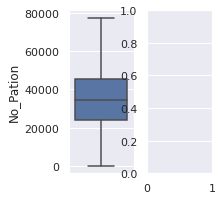

In [98]:
plt.figure(figsize=(18,3))
for i,att in enumerate(pre_process_df.columns):
    plt.subplot(1,len(pre_process_df.columns),i+1)
    sns.boxplot(y=pre_process_df[att])
plt.tight_layout()
plt.show()